In [53]:
from sklearn.model_selection import train_test_split
import pandas as pd
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.datasets import imdb

# set parameters:
max_features = 16
maxlen = 16
batch_size = 32
embedding_dims = 50
filters = 250
kernel_size = 3
hidden_dims = 250
epochs = 2

print('Loading data...')
dataset = pd.read_csv('pgp_property.txt', header=None, sep=' ')
X, y = dataset.iloc[:,1:-1], dataset.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=428)
print(X_train.shape)
X_train = X_train.values.reshape(X_train.shape[0],  16)
X_test = X_test.values.reshape(X_test.shape[0],  16)

print(X_train.shape)
print('data loaded')


Loading data...
(265, 16)
(265, 16)
data loaded


In [64]:
print('Build model...')
model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into embedding_dims dimensions
model.add(Embedding(max_features,  embedding_dims, input_length=maxlen))
model.add(Dropout(0.2))

# we add a Convolution1D, which will learn filters
# word group filters of size filter_length:
print("add conv1d layer")
model.add(Conv1D(filters=filters,
                 kernel_size=3,
                 padding='valid',
                 activation='relu',
                 strides=1,
              
                 ))
# we use max pooling:
print("add pooling layer")
model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model.add(Dense(20))
model.add(Dropout(0.2))
model.add(Activation('relu'))


# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
print("model built")


Build model...
add conv1d layer
add pooling layer
model built


In [70]:
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=1000,
          validation_data=(X_test, y_test))

Train on 265 samples, validate on 67 samples
Epoch 1/1000
265/265 [==============================] - 0s - loss: 0.1369 - acc: 0.9245 - val_loss: 1.7137 - val_acc: 0.7164
Epoch 2/1000
265/265 [==============================] - 0s - loss: 0.1370 - acc: 0.9396 - val_loss: 1.6734 - val_acc: 0.7612
Epoch 3/1000
265/265 [==============================] - 0s - loss: 0.1402 - acc: 0.9358 - val_loss: 1.7128 - val_acc: 0.7463
Epoch 4/1000
265/265 [==============================] - 0s - loss: 0.1791 - acc: 0.9170 - val_loss: 1.3296 - val_acc: 0.7015
Epoch 5/1000
265/265 [==============================] - 0s - loss: 0.1874 - acc: 0.8981 - val_loss: 1.5796 - val_acc: 0.7015
Epoch 6/1000
265/265 [==============================] - 0s - loss: 0.1871 - acc: 0.9208 - val_loss: 1.4512 - val_acc: 0.7015
Epoch 7/1000
265/265 [==============================] - 0s - loss: 0.1699 - acc: 0.9245 - val_loss: 1.2500 - val_acc: 0.7164
Epoch 8/1000
265/265 [==============================] - 0s - loss: 0.1980 - acc:

265/265 [==============================] - 0s - loss: 0.1241 - acc: 0.9585 - val_loss: 1.8571 - val_acc: 0.7015
Epoch 66/1000
265/265 [==============================] - 0s - loss: 0.1079 - acc: 0.9736 - val_loss: 1.8016 - val_acc: 0.7015
Epoch 67/1000
265/265 [==============================] - 0s - loss: 0.1147 - acc: 0.9660 - val_loss: 1.5833 - val_acc: 0.6716
Epoch 68/1000
265/265 [==============================] - 0s - loss: 0.1311 - acc: 0.9660 - val_loss: 1.6328 - val_acc: 0.7015
Epoch 69/1000
265/265 [==============================] - 0s - loss: 0.0848 - acc: 0.9849 - val_loss: 1.7549 - val_acc: 0.6716
Epoch 70/1000
265/265 [==============================] - 0s - loss: 0.0895 - acc: 0.9698 - val_loss: 1.7257 - val_acc: 0.7463
Epoch 71/1000
265/265 [==============================] - 0s - loss: 0.1020 - acc: 0.9698 - val_loss: 1.6483 - val_acc: 0.7164
Epoch 72/1000
265/265 [==============================] - 0s - loss: 0.0871 - acc: 0.9698 - val_loss: 1.7528 - val_acc: 0.7015
Epoch 

265/265 [==============================] - 0s - loss: 0.0978 - acc: 0.9736 - val_loss: 2.0846 - val_acc: 0.6716
Epoch 130/1000
265/265 [==============================] - 0s - loss: 0.0835 - acc: 0.9811 - val_loss: 2.2116 - val_acc: 0.6716
Epoch 131/1000
265/265 [==============================] - 0s - loss: 0.1438 - acc: 0.9585 - val_loss: 2.1826 - val_acc: 0.6716
Epoch 132/1000
265/265 [==============================] - 0s - loss: 0.0851 - acc: 0.9849 - val_loss: 2.0919 - val_acc: 0.6716
Epoch 133/1000
265/265 [==============================] - 0s - loss: 0.0909 - acc: 0.9736 - val_loss: 2.1326 - val_acc: 0.6866
Epoch 134/1000
265/265 [==============================] - 0s - loss: 0.0788 - acc: 0.9887 - val_loss: 2.2692 - val_acc: 0.6866
Epoch 135/1000
265/265 [==============================] - 0s - loss: 0.1164 - acc: 0.9698 - val_loss: 2.2047 - val_acc: 0.6866
Epoch 136/1000
265/265 [==============================] - 0s - loss: 0.1064 - acc: 0.9811 - val_loss: 2.0230 - val_acc: 0.7164

265/265 [==============================] - 0s - loss: 0.1058 - acc: 0.9736 - val_loss: 2.2432 - val_acc: 0.7015
Epoch 194/1000
265/265 [==============================] - 0s - loss: 0.0694 - acc: 0.9811 - val_loss: 2.1659 - val_acc: 0.7015
Epoch 195/1000
265/265 [==============================] - 0s - loss: 0.0816 - acc: 0.9774 - val_loss: 2.1567 - val_acc: 0.7015
Epoch 196/1000
265/265 [==============================] - 0s - loss: 0.0865 - acc: 0.9698 - val_loss: 2.3102 - val_acc: 0.7015
Epoch 197/1000
265/265 [==============================] - 0s - loss: 0.0778 - acc: 0.9774 - val_loss: 2.3816 - val_acc: 0.6866
Epoch 198/1000
265/265 [==============================] - 0s - loss: 0.1186 - acc: 0.9585 - val_loss: 2.2142 - val_acc: 0.7015
Epoch 199/1000
265/265 [==============================] - 0s - loss: 0.0943 - acc: 0.9736 - val_loss: 2.1255 - val_acc: 0.6567
Epoch 200/1000
265/265 [==============================] - 0s - loss: 0.0950 - acc: 0.9736 - val_loss: 2.0766 - val_acc: 0.6866

265/265 [==============================] - 0s - loss: 0.0770 - acc: 0.9736 - val_loss: 2.0107 - val_acc: 0.6866
Epoch 258/1000
265/265 [==============================] - 0s - loss: 0.0882 - acc: 0.9736 - val_loss: 2.0400 - val_acc: 0.6866
Epoch 259/1000
265/265 [==============================] - 0s - loss: 0.0718 - acc: 0.9774 - val_loss: 2.0996 - val_acc: 0.7015
Epoch 260/1000
265/265 [==============================] - 0s - loss: 0.0687 - acc: 0.9811 - val_loss: 2.1120 - val_acc: 0.7015
Epoch 261/1000
265/265 [==============================] - 0s - loss: 0.0677 - acc: 0.9811 - val_loss: 2.1693 - val_acc: 0.7015
Epoch 262/1000
265/265 [==============================] - 0s - loss: 0.0764 - acc: 0.9849 - val_loss: 2.1446 - val_acc: 0.7015
Epoch 263/1000
265/265 [==============================] - 0s - loss: 0.0692 - acc: 0.9849 - val_loss: 2.2175 - val_acc: 0.6866
Epoch 264/1000
265/265 [==============================] - 0s - loss: 0.0741 - acc: 0.9811 - val_loss: 2.3228 - val_acc: 0.6716

265/265 [==============================] - 0s - loss: 0.0621 - acc: 0.9811 - val_loss: 2.2243 - val_acc: 0.7015
Epoch 322/1000
265/265 [==============================] - 0s - loss: 0.0430 - acc: 0.9962 - val_loss: 2.1917 - val_acc: 0.7164
Epoch 323/1000
265/265 [==============================] - 0s - loss: 0.0722 - acc: 0.9811 - val_loss: 2.3132 - val_acc: 0.7015
Epoch 324/1000
265/265 [==============================] - 0s - loss: 0.0574 - acc: 0.9849 - val_loss: 2.9667 - val_acc: 0.6716
Epoch 325/1000
265/265 [==============================] - 0s - loss: 0.0889 - acc: 0.9623 - val_loss: 2.1135 - val_acc: 0.6866
Epoch 326/1000
265/265 [==============================] - 0s - loss: 0.0960 - acc: 0.9623 - val_loss: 2.0493 - val_acc: 0.6716
Epoch 327/1000
265/265 [==============================] - 0s - loss: 0.0847 - acc: 0.9849 - val_loss: 2.1515 - val_acc: 0.6716
Epoch 328/1000
265/265 [==============================] - 0s - loss: 0.0659 - acc: 0.9811 - val_loss: 2.5528 - val_acc: 0.6567

265/265 [==============================] - 0s - loss: 0.1158 - acc: 0.9509 - val_loss: 1.8917 - val_acc: 0.7164
Epoch 386/1000
265/265 [==============================] - 0s - loss: 0.0938 - acc: 0.9623 - val_loss: 2.5729 - val_acc: 0.6716
Epoch 387/1000
265/265 [==============================] - 0s - loss: 0.1019 - acc: 0.9547 - val_loss: 2.4242 - val_acc: 0.6716
Epoch 388/1000
265/265 [==============================] - 0s - loss: 0.0631 - acc: 0.9774 - val_loss: 2.0962 - val_acc: 0.7313
Epoch 389/1000
265/265 [==============================] - 0s - loss: 0.0676 - acc: 0.9736 - val_loss: 2.2454 - val_acc: 0.7313
Epoch 390/1000
265/265 [==============================] - 0s - loss: 0.0674 - acc: 0.9774 - val_loss: 3.1767 - val_acc: 0.6269
Epoch 391/1000
265/265 [==============================] - 0s - loss: 0.0851 - acc: 0.9736 - val_loss: 2.2130 - val_acc: 0.7015
Epoch 392/1000
265/265 [==============================] - 0s - loss: 0.0549 - acc: 0.9962 - val_loss: 2.3063 - val_acc: 0.7164

265/265 [==============================] - 0s - loss: 0.0657 - acc: 0.9811 - val_loss: 2.4786 - val_acc: 0.6866
Epoch 450/1000
265/265 [==============================] - 0s - loss: 0.0717 - acc: 0.9736 - val_loss: 2.1467 - val_acc: 0.7015
Epoch 451/1000
265/265 [==============================] - 0s - loss: 0.0557 - acc: 0.9887 - val_loss: 2.0754 - val_acc: 0.6866
Epoch 452/1000
265/265 [==============================] - 0s - loss: 0.0830 - acc: 0.9623 - val_loss: 2.4556 - val_acc: 0.6866
Epoch 453/1000
265/265 [==============================] - 0s - loss: 0.0766 - acc: 0.9698 - val_loss: 2.6678 - val_acc: 0.6866
Epoch 454/1000
265/265 [==============================] - 0s - loss: 0.0699 - acc: 0.9736 - val_loss: 2.7911 - val_acc: 0.7015
Epoch 455/1000
265/265 [==============================] - 0s - loss: 0.0969 - acc: 0.9623 - val_loss: 2.6206 - val_acc: 0.7015
Epoch 456/1000
265/265 [==============================] - 0s - loss: 0.0521 - acc: 0.9849 - val_loss: 1.8858 - val_acc: 0.6716

265/265 [==============================] - 0s - loss: 0.0571 - acc: 0.9811 - val_loss: 2.8167 - val_acc: 0.6567
Epoch 514/1000
265/265 [==============================] - 0s - loss: 0.0534 - acc: 0.9811 - val_loss: 2.7774 - val_acc: 0.6567
Epoch 515/1000
265/265 [==============================] - 0s - loss: 0.0609 - acc: 0.9811 - val_loss: 2.5625 - val_acc: 0.6567
Epoch 516/1000
265/265 [==============================] - 0s - loss: 0.0902 - acc: 0.9623 - val_loss: 2.4646 - val_acc: 0.6567
Epoch 517/1000
265/265 [==============================] - 0s - loss: 0.0686 - acc: 0.9736 - val_loss: 2.3789 - val_acc: 0.6567
Epoch 518/1000
265/265 [==============================] - 0s - loss: 0.0810 - acc: 0.9736 - val_loss: 2.2733 - val_acc: 0.7015
Epoch 519/1000
265/265 [==============================] - 0s - loss: 0.0579 - acc: 0.9811 - val_loss: 2.4772 - val_acc: 0.6866
Epoch 520/1000
265/265 [==============================] - 0s - loss: 0.0611 - acc: 0.9774 - val_loss: 3.2847 - val_acc: 0.6567

265/265 [==============================] - 0s - loss: 0.0334 - acc: 0.9962 - val_loss: 2.3640 - val_acc: 0.6716
Epoch 578/1000
265/265 [==============================] - 0s - loss: 0.0801 - acc: 0.9736 - val_loss: 2.4712 - val_acc: 0.6716
Epoch 579/1000
265/265 [==============================] - 0s - loss: 0.0425 - acc: 0.9887 - val_loss: 2.5694 - val_acc: 0.6716
Epoch 580/1000
265/265 [==============================] - 0s - loss: 0.0462 - acc: 0.9925 - val_loss: 2.6458 - val_acc: 0.6716
Epoch 581/1000
265/265 [==============================] - 0s - loss: 0.0592 - acc: 0.9811 - val_loss: 2.6855 - val_acc: 0.6716
Epoch 582/1000
265/265 [==============================] - 0s - loss: 0.0668 - acc: 0.9774 - val_loss: 2.7063 - val_acc: 0.6716
Epoch 583/1000
265/265 [==============================] - 0s - loss: 0.0558 - acc: 0.9811 - val_loss: 2.7301 - val_acc: 0.6716
Epoch 584/1000
265/265 [==============================] - 0s - loss: 0.0278 - acc: 0.9962 - val_loss: 2.7816 - val_acc: 0.6716

265/265 [==============================] - 0s - loss: 0.0698 - acc: 0.9736 - val_loss: 2.4737 - val_acc: 0.6716
Epoch 642/1000
265/265 [==============================] - 0s - loss: 0.0515 - acc: 0.9849 - val_loss: 2.4184 - val_acc: 0.7015
Epoch 643/1000
265/265 [==============================] - 0s - loss: 0.0482 - acc: 0.9849 - val_loss: 2.4400 - val_acc: 0.7015
Epoch 644/1000
265/265 [==============================] - 0s - loss: 0.0697 - acc: 0.9736 - val_loss: 2.4749 - val_acc: 0.7015
Epoch 645/1000
265/265 [==============================] - 0s - loss: 0.0609 - acc: 0.9849 - val_loss: 2.5040 - val_acc: 0.7015
Epoch 646/1000
265/265 [==============================] - 0s - loss: 0.0489 - acc: 0.9887 - val_loss: 2.5268 - val_acc: 0.7015
Epoch 647/1000
265/265 [==============================] - 0s - loss: 0.0324 - acc: 0.9962 - val_loss: 2.5484 - val_acc: 0.6567
Epoch 648/1000
265/265 [==============================] - 0s - loss: 0.0655 - acc: 0.9774 - val_loss: 2.6367 - val_acc: 0.6716

265/265 [==============================] - 0s - loss: 0.0575 - acc: 0.9811 - val_loss: 1.8350 - val_acc: 0.7015
Epoch 706/1000
265/265 [==============================] - 0s - loss: 0.0644 - acc: 0.9811 - val_loss: 2.0368 - val_acc: 0.6866
Epoch 707/1000
265/265 [==============================] - 0s - loss: 0.0626 - acc: 0.9774 - val_loss: 2.2141 - val_acc: 0.7015
Epoch 708/1000
265/265 [==============================] - 0s - loss: 0.0871 - acc: 0.9660 - val_loss: 2.4488 - val_acc: 0.7015
Epoch 709/1000
265/265 [==============================] - 0s - loss: 0.0542 - acc: 0.9849 - val_loss: 2.6080 - val_acc: 0.7015
Epoch 710/1000
265/265 [==============================] - 0s - loss: 0.0584 - acc: 0.9811 - val_loss: 2.7920 - val_acc: 0.7015
Epoch 711/1000
265/265 [==============================] - 0s - loss: 0.0483 - acc: 0.9849 - val_loss: 2.8455 - val_acc: 0.6866
Epoch 712/1000
265/265 [==============================] - 0s - loss: 0.0446 - acc: 0.9887 - val_loss: 2.4978 - val_acc: 0.7015

265/265 [==============================] - 0s - loss: 0.0456 - acc: 0.9887 - val_loss: 3.1553 - val_acc: 0.7164
Epoch 770/1000
265/265 [==============================] - 0s - loss: 0.0566 - acc: 0.9811 - val_loss: 2.9513 - val_acc: 0.7164
Epoch 771/1000
265/265 [==============================] - 0s - loss: 0.0830 - acc: 0.9660 - val_loss: 2.9681 - val_acc: 0.7164
Epoch 772/1000
265/265 [==============================] - 0s - loss: 0.0834 - acc: 0.9774 - val_loss: 2.6819 - val_acc: 0.6866
Epoch 773/1000
265/265 [==============================] - 0s - loss: 0.0642 - acc: 0.9811 - val_loss: 2.4766 - val_acc: 0.7164
Epoch 774/1000
265/265 [==============================] - 0s - loss: 0.1015 - acc: 0.9623 - val_loss: 2.5521 - val_acc: 0.6567
Epoch 775/1000
265/265 [==============================] - 0s - loss: 0.0938 - acc: 0.9736 - val_loss: 2.2225 - val_acc: 0.6418
Epoch 776/1000
265/265 [==============================] - 0s - loss: 0.0600 - acc: 0.9774 - val_loss: 2.1741 - val_acc: 0.6716

265/265 [==============================] - 0s - loss: 0.0593 - acc: 0.9811 - val_loss: 3.4303 - val_acc: 0.6418
Epoch 834/1000
265/265 [==============================] - 0s - loss: 0.0342 - acc: 0.9925 - val_loss: 3.4462 - val_acc: 0.6418
Epoch 835/1000
265/265 [==============================] - 0s - loss: 0.0547 - acc: 0.9774 - val_loss: 3.4051 - val_acc: 0.6418
Epoch 836/1000
265/265 [==============================] - 0s - loss: 0.0414 - acc: 0.9925 - val_loss: 3.3006 - val_acc: 0.6418
Epoch 837/1000
265/265 [==============================] - 0s - loss: 0.0552 - acc: 0.9811 - val_loss: 3.2147 - val_acc: 0.6716
Epoch 838/1000
265/265 [==============================] - 0s - loss: 0.0565 - acc: 0.9811 - val_loss: 3.1925 - val_acc: 0.6866
Epoch 839/1000
265/265 [==============================] - 0s - loss: 0.0455 - acc: 0.9887 - val_loss: 3.2043 - val_acc: 0.6866
Epoch 840/1000
265/265 [==============================] - 0s - loss: 0.0518 - acc: 0.9849 - val_loss: 3.2590 - val_acc: 0.6716

265/265 [==============================] - 0s - loss: 0.0336 - acc: 0.9962 - val_loss: 2.8586 - val_acc: 0.6866
Epoch 898/1000
265/265 [==============================] - 0s - loss: 0.0823 - acc: 0.9698 - val_loss: 2.9321 - val_acc: 0.7015
Epoch 899/1000
265/265 [==============================] - 0s - loss: 0.0562 - acc: 0.9849 - val_loss: 3.1082 - val_acc: 0.6866
Epoch 900/1000
265/265 [==============================] - 0s - loss: 0.0670 - acc: 0.9736 - val_loss: 3.1874 - val_acc: 0.6866
Epoch 901/1000
265/265 [==============================] - 0s - loss: 0.0345 - acc: 0.9925 - val_loss: 3.2812 - val_acc: 0.6866
Epoch 902/1000
265/265 [==============================] - 0s - loss: 0.0662 - acc: 0.9736 - val_loss: 3.2410 - val_acc: 0.6866
Epoch 903/1000
265/265 [==============================] - 0s - loss: 0.0531 - acc: 0.9811 - val_loss: 3.1023 - val_acc: 0.6866
Epoch 904/1000
265/265 [==============================] - 0s - loss: 0.0527 - acc: 0.9849 - val_loss: 2.9139 - val_acc: 0.6866

265/265 [==============================] - 0s - loss: 0.0685 - acc: 0.9736 - val_loss: 2.7539 - val_acc: 0.6567
Epoch 962/1000
265/265 [==============================] - 0s - loss: 0.0425 - acc: 0.9925 - val_loss: 3.0425 - val_acc: 0.7015
Epoch 963/1000
265/265 [==============================] - 0s - loss: 0.0674 - acc: 0.9774 - val_loss: 3.1454 - val_acc: 0.7313
Epoch 964/1000
265/265 [==============================] - 0s - loss: 0.0834 - acc: 0.9698 - val_loss: 3.0497 - val_acc: 0.6866
Epoch 965/1000
265/265 [==============================] - 0s - loss: 0.0742 - acc: 0.9736 - val_loss: 2.7936 - val_acc: 0.7313
Epoch 966/1000
265/265 [==============================] - 0s - loss: 0.0218 - acc: 0.9962 - val_loss: 2.6351 - val_acc: 0.7164
Epoch 967/1000
265/265 [==============================] - 0s - loss: 0.0828 - acc: 0.9660 - val_loss: 2.4402 - val_acc: 0.6866
Epoch 968/1000
265/265 [==============================] - 0s - loss: 0.0802 - acc: 0.9698 - val_loss: 2.5995 - val_acc: 0.6866

In [71]:
y_score=model.predict_proba(X_test)


32/67 [=============>................] - ETA: 0s

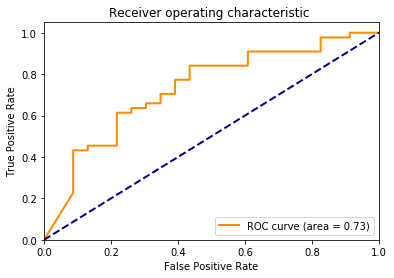

In [72]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc



y_score_get_value=[]
for item in y_score:
    y_score_get_value.append(item[0])
    
fpr, tpr, _ = roc_curve(y_test, y_score_get_value)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr,tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic ')
plt.legend(loc="lower right")
plt.show()






